## Q1.1

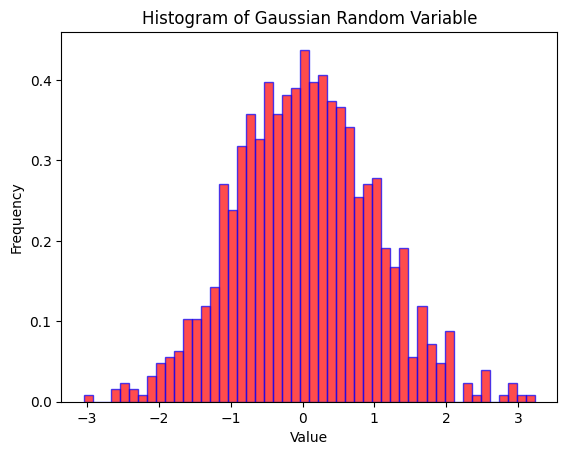

In [15]:
import numpy as np
import matplotlib.pyplot as plt
mean = 0  
std_dev = 1  
num_samples = 1000  
x = np.random.normal(mean, std_dev, num_samples)

plt.hist(x, bins=50, density=True, alpha=0.7,edgecolor='blue' ,color='red')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Gaussian Random Variable')
plt.show()

## Q1.2

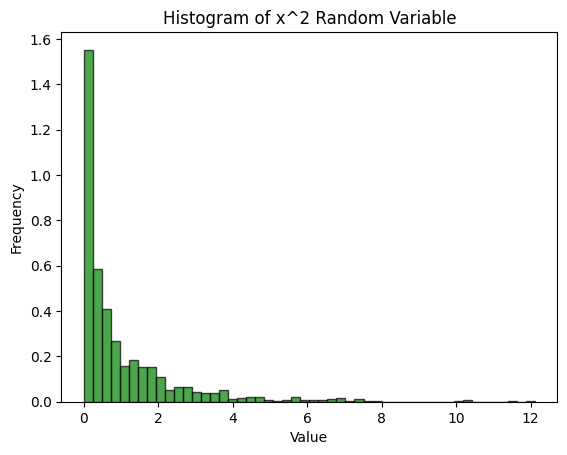

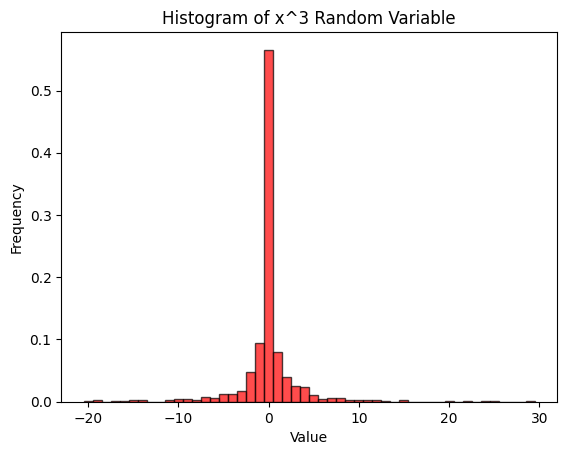

In [8]:
x_squared = np.random.normal(mean, std_dev, num_samples)**2

plt.hist(x_squared, bins=50, density=True, alpha=0.7,edgecolor='black' ,color='green')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of x^2 Random Variable')
plt.show()

x_cubed = np.random.normal(mean, std_dev, num_samples)**3

plt.hist(x_cubed, bins=50, density=True, alpha=0.7,edgecolor='black', color='red')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of x^3 Random Variable')
plt.show()

## Q1.3

The entropy of a discrete random variable $ X $ with probability mass function $ p(x) $ is defined as:

$$ H(X) = - \sum_{x} p(x) \log(p(x)) $$

where $ x $ ranges over all possible values of the random variable. This formula captures the measure of uncertainty or disorder in the system represented by the random variable $ X $. 

Entropy is a fundamental concept in information theory and plays a crucial role in various fields such as statistics, machine learning, and thermodynamics. It quantifies the amount of information needed to describe the random variable or the average amount of surprise associated with the outcomes of the random variable.

In [4]:

import numpy as np

# Generate a random probability distribution for the random variable X
probabilities = np.random.dirichlet(alpha=np.ones(4))

# Calculate the entropy of the random variable X
entropy_X = -np.sum([p * np.log2(p) for p in probabilities if p > 0])

print("Generated Probabilities:", probabilities)
print("Entropy of X:", entropy_X)

import numpy as np

# Generate a random probability distribution for the random variable X^2
probabilities_X2 = np.random.dirichlet(alpha=np.ones(4))

# Calculate the entropy of the random variable X^2
entropy_X2 = -np.sum([p * np.log2(p) for p in probabilities_X2 if p > 0])

print("Generated Probabilities for X^2:", probabilities_X2)
print("Entropy of X^2:", entropy_X2)

import numpy as np

# Generate a random probability distribution for the random variable X^3
probabilities_X3 = np.random.dirichlet(alpha=np.ones(4))

# Calculate the entropy of the random variable X^3
entropy_X3 = -np.sum([p * np.log2(p) for p in probabilities_X3 if p > 0])

print("Generated Probabilities for X^3:", probabilities_X3)
print("Entropy of X^3:", entropy_X3)

Generated Probabilities: [0.1194099  0.57668695 0.13241874 0.17148441]
Entropy of X: 1.6465539007507803
Generated Probabilities for X^2: [0.36631521 0.11391492 0.44510342 0.07466645]
Entropy of X^2: 1.687031447019849
Generated Probabilities for X^3: [0.21613258 0.21199247 0.31509884 0.25677611]
Entropy of X^3: 1.9807153261469308


## Q2.1





A Hamming code is an error-correction code that is used to detect and correct errors in data transmission. It is named after Richard Hamming.



In a Hamming code, the data to be transmitted is divided into data bits and parity bits. The parity bits are used to ensure the integrity of the data during transmission.



Let's consider a 4-bit input data $D = d_1d_2d_3d_4$. The Hamming code is generated as follows:

1. Insert the data bits into the Hamming code as follows:

$$
\begin{array}{|c|c|c|c|c|c|c|c|}
\hline
d_1 & d_2 & d_3 & d_4 & P1 & P2 & P3 \\
\hline
\end{array}
$$

2. Calculate the parity bits $P1$, $P2$, and $P3$ based on the data bits $d_1$, $d_2$, $d_3$, and $d_4$ as follows:

$$
\begin{aligned}
P1 &= d_1 \oplus d_2 \oplus d_3, \\
P2 &= d_1 \oplus d_2 \oplus d_4, \\
P3 &= d_1 \oplus d_3 \oplus d_4.
\end{aligned}
$$

3. Insert the parity bits into the appropriate positions in the Hamming code.

The resulting 7-bit Hamming code is transmitted over the channel. Upon reception, errors in the data can be detected and corrected using the parity bits.



In [47]:
def calculate_parity_bits(data):
    d1, d2, d3, d4 = map(int, data)
    
    p1 = d1 ^ d2 ^ d3
    p2 = d1 ^ d2 ^ d4
    p3 = d1 ^ d3 ^ d4
    
    return [d1, d2, d3, d4, p1, p2, p3]

def generate_hamming_code(input_data):
    if len(input_data) != 4:
        return "Input data must be 4 bits long"
    
    hamming_code = calculate_parity_bits(input_data)
    
    return hamming_code

# Input data
input_data = "0011"

# Generate Hamming code
hamming_code = generate_hamming_code(input_data)

print("Input Data:", input_data)
print("Generated Hamming Code:", hamming_code)

Input Data: 0011
Generated Hamming Code: [0, 0, 1, 1, 1, 1, 0]


## Q2.2

In [51]:
import random

def check_parity(bits):
    return 1 if bits.count('1') % 2 != 0 else 0

def correct_data(binary_input):
    # Extract individual bits
    d1 = int(binary_input[0])
    d2 = int(binary_input[1])
    d3 = int(binary_input[2])
    d4 = int(binary_input[3])
    p1 = int(binary_input[4])
    p2 = int(binary_input[5])
    p3 = int(binary_input[6])
    
    # Calculate c1, c2, c3
    c1 = check_parity(f"{d1}{d2}{d3}{p1}")
    c2 = check_parity(f"{d1}{d2}{d4}{p2}")
    c3 = check_parity(f"{d1}{d3}{d4}{p3}")
    
    # Determine the output based on c1, c2, c3
    if c1 == c2 == c3 == 0:
        return "There is no error in the code."
    elif c1 == c2 == 0 and c3 == 1:
        return f"Data number: {d1}{d2}{d3}{d4}"
    elif c1 == c3 == 0 and c2 == 1:
        return f"Data number: {d1}{d2}{d3}{d4}"
    elif c1 == 1 and c2 == c3 == 0:
        return f"Data number: {d1}{d2}{d3}{d4}"
    elif c1 == 0 and c2 == c3 == 1:
        return f"Data number: {d1}{d2}{d3}{1 if d4 == 0 else 0}"
    elif c1 == c3 == 1 and c2 == 0:
        return f"Data number: {d1}{d2}{0 if d3 == 1 else 1}{d4}"
    elif c1 == c2 == 1 and c3 == 0:
        return f"Data number: {d1}{0 if d2 == 1 else 1}{d3}{d4}"
    elif c1 == c2 == c3 == 1:
        return f"Data number: {0 if d1 == 1 else 1}{d2}{d3}{d4}"

# Generate and correct 10 random 7-bit binary numbers
for _ in range(10):
    random_binary = ''.join(str(random.randint(0, 1)) for _ in range(7))
    print("Random Binary Input:", random_binary)
    result = correct_data(random_binary)
    print("Correction Result:", result)
    print()

Random Binary Input: 0101110
Correction Result: Data number: 0100

Random Binary Input: 0110000
Correction Result: Data number: 0111

Random Binary Input: 0001000
Correction Result: Data number: 0000

Random Binary Input: 0110111
Correction Result: Data number: 0110

Random Binary Input: 0100110
Correction Result: There is no error in the code.

Random Binary Input: 0110111
Correction Result: Data number: 0110

Random Binary Input: 0110000
Correction Result: Data number: 0111

Random Binary Input: 0010101
Correction Result: There is no error in the code.

Random Binary Input: 1011001
Correction Result: There is no error in the code.

Random Binary Input: 0111010
Correction Result: Data number: 0111

